# 0. Load libraries

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import cufflinks as cf
from pandas_datareader import data
from pandas.tseries.frequencies import to_offset
import csv
from datetime import datetime, date, timedelta
import random
from matplotlib import pyplot

# 1. Constants

In [2]:
#                         Halving Dates
#0 is related to the firs halving from 2012-11-28 to 2016-07-09

#1 is related to the second halving from 2016-07-09 to 2020-05-11

#2 is related to the third halving from 2020-05-11 to early 2024
halving = ["2012-11-28","2016-07-09","2020-05-11","2024-05-30"]

# The first halving is not going to be considered because the data is not realiable enough

In [3]:
today = date.today()

In [4]:
next_halving = datetime.strptime('2024-05-30', "%Y-%m-%d").date()

In [5]:
print("Current Date ", today)
print("Next Halving: ", next_halving) # https://bitcoinblockhalf.com/

Current Date  2023-01-29
Next Halving:  2024-05-30


In [6]:
bph = 210000 # Blocks between Halving

In [7]:
# https://bitcoinblockhalf.com/
duh = next_halving-today
duh = duh.days # Days Until Halving
print("Number of Months until next halvin: ", int(duh/30))

Number of Months until next halvin:  16


# 2. Read Data

Data goes from 2011-05-21 to 2023-01-31

In [8]:
df = pd.read_csv('BTC.csv')
df["Date"] = pd.to_datetime(df["Date"])
df.index = df["Date"]

In [9]:
price_btc_today = df.Price[0]

In [10]:
df.drop(['Date','Open','High','Low','Vol.'], axis=1,inplace=True)

In [11]:
df = df.resample('M').last()

In [12]:
df["pct_returns"] = df.Price.pct_change(periods = 1)

In [13]:
df.isnull().values.any()

True

In [14]:
df.dropna(inplace=True)

In [15]:
df["Date"]=df.index

In [16]:
df.head(3)

,Price,pct_returns,Date
Date,,,
2011-05-31,8.7,1.485714,2011-05-31
2011-06-30,16.1,0.850575,2011-06-30
2011-07-31,13.4,-0.167702,2011-07-31


In [17]:
df.tail(3)

,Price,pct_returns,Date
Date,,,
2022-11-30,17163.9,-0.162585,2022-11-30
2022-12-31,16537.4,-0.036501,2022-12-31
2023-01-31,22866.8,0.382732,2023-01-31


# 3. Halvings Days

In [18]:
d1 = datetime.strptime(halving[0], "%Y-%m-%d")
d2 = datetime.strptime(halving[1], "%Y-%m-%d")
# difference between dates in timedelta
delta_0 = d2 - d1
print(f'Difference is {delta_0.days} days')

Difference is 1319 days


In [19]:
d1 = datetime.strptime(halving[1], "%Y-%m-%d")
d2 = datetime.strptime(halving[2], "%Y-%m-%d")
# difference between dates in timedelta
delta_1 = d2 - d1
print(f'Difference is {delta_1.days} days')

Difference is 1402 days


In [20]:
d1 = datetime.strptime(halving[2], "%Y-%m-%d")
d2 = datetime.strptime(halving[3], "%Y-%m-%d")
# difference between dates in timedelta
delta_2 = d2 - d1
print(f'Difference is {delta_2.days} days')

Difference is 1480 days


In [21]:
print("Halving expected each", (bph*10)/60/24, "days")

Halving expected each 1458.3333333333333 days


## 3.1. Splitting Data Set in the Different Halvings

In [22]:
mask0 = (df['Date'] > '2008-01-01') & (df['Date'] <= halving[0])
mask1 = (df['Date'] >  halving[0]) & (df['Date'] <= halving[1])
mask2 = (df['Date'] >  halving[1]) & (df['Date'] <= halving[2])
mask3 = (df['Date'] >  halving[2]) & (df['Date'] <= halving[3])

## 3.2. First Halving  2012-11-28

In [23]:
df_halving_0 = pd.DataFrame()
df_halving_0["Price_0"]=df.loc[mask0]["Price"]
df_halving_0["Date_0"]=df.loc[mask0]["Date"]
df_halving_0["returns_0"] = df.loc[mask0]["pct_returns"]
#df_halving_0["d_returns_0"] = df_halving_0["returns_0"]+1
#df_halving_0["c_returns_0"] = df_halving_0["d_returns_0"].cumprod()
df_halving_0.index = range(len(df_halving_0))[::-1]
df_halving_0.index=df_halving_0.index*-1
print(df_halving_0)

     Price_0     Date_0  returns_0
-17      8.7 2011-05-31   1.485714
-16     16.1 2011-06-30   0.850575
-15     13.4 2011-07-31  -0.167702
-14      8.2 2011-08-31  -0.388060
-13      5.1 2011-09-30  -0.378049
-12      3.3 2011-10-31  -0.352941
-11      3.0 2011-11-30  -0.090909
-10      4.7 2011-12-31   0.566667
-9       5.5 2012-01-31   0.170213
-8       4.9 2012-02-29  -0.109091
-7       4.9 2012-03-31   0.000000
-6       4.9 2012-04-30   0.000000
-5       5.2 2012-05-31   0.061224
-4       6.7 2012-06-30   0.288462
-3       9.4 2012-07-31   0.402985
-2      10.2 2012-08-31   0.085106
-1      12.4 2012-09-30   0.215686
0       11.2 2012-10-31  -0.096774


## 3.3. Second Halving  2016-07-09

In [24]:
df_halving_1 = pd.DataFrame()
df_halving_1["Price_1"]=df.loc[mask1]["Price"]
df_halving_1["Date_1"]=df.loc[mask1]["Date"]
df_halving_1["returns_1"] = df.loc[mask1]["pct_returns"]
df_halving_1.index = range(len(df_halving_1))[::-1]
df_halving_1.index=df_halving_1.index*-1
print(df_halving_1)

     Price_1     Date_1  returns_1
-43     12.6 2012-11-30   0.125000
-42     13.5 2012-12-31   0.071429
-41     20.4 2013-01-31   0.511111
-40     33.4 2013-02-28   0.637255
-39     93.0 2013-03-31   1.784431
-38    139.2 2013-04-30   0.496774
-37    128.8 2013-05-31  -0.074713
-36     97.5 2013-06-30  -0.243012
-35    106.2 2013-07-31   0.089231
-34    141.0 2013-08-31   0.327684
-33    141.9 2013-09-30   0.006383
-32    211.2 2013-10-31   0.488372
-31   1205.7 2013-11-30   4.708807
-30    805.9 2013-12-31  -0.331592
-29    938.8 2014-01-31   0.164909
-28    573.9 2014-02-28  -0.388688
-27    444.7 2014-03-31  -0.225126
-26    445.6 2014-04-30   0.002024
-25    627.9 2014-05-31   0.409111
-24    635.1 2014-06-30   0.011467
-23    589.5 2014-07-31  -0.071800
-22    481.8 2014-08-31  -0.182697
-21    388.2 2014-09-30  -0.194271
-20    337.9 2014-10-31  -0.129572
-19    374.9 2014-11-30   0.109500
-18    318.2 2014-12-31  -0.151240
-17    218.5 2015-01-31  -0.313325
-16    254.1 2015-02

## 3.4. Third Halving  2020-05-11

In [25]:
df_halving_2 = pd.DataFrame()
df_halving_2["Price_2"]=df.loc[mask2]["Price"]
df_halving_2["Date_2"]=df.loc[mask2]["Date"]
df_halving_2["returns_2"] = df.loc[mask2]["pct_returns"]
df_halving_2.index = range(len(df_halving_2))[::-1]
df_halving_2.index=df_halving_2.index*-1
print(df_halving_2)

     Price_2     Date_2  returns_2
-45    621.9 2016-07-31  -0.071791
-44    573.9 2016-08-31  -0.077183
-43    608.1 2016-09-30   0.059592
-42    698.7 2016-10-31   0.148989
-41    742.5 2016-11-30   0.062688
-40    963.4 2016-12-31   0.297508
-39    965.5 2017-01-31   0.002180
-38   1189.3 2017-02-28   0.231797
-37   1079.1 2017-03-31  -0.092660
-36   1351.9 2017-04-30   0.252803
-35   2303.3 2017-05-31   0.703750
-34   2480.6 2017-06-30   0.076977
-33   2883.3 2017-07-31   0.162340
-32   4735.1 2017-08-31   0.642250
-31   4360.6 2017-09-30  -0.079090
-30   6451.2 2017-10-31   0.479429
-29   9946.8 2017-11-30   0.541853
-28  13850.4 2017-12-31   0.392448
-27  10265.4 2018-01-31  -0.258837
-26  10333.9 2018-02-28   0.006673
-25   6938.2 2018-03-31  -0.328598
-24   9245.1 2018-04-30   0.332493
-23   7502.6 2018-05-31  -0.188478
-22   6398.9 2018-06-30  -0.147109
-21   7729.4 2018-07-31   0.207926
-20   7033.8 2018-08-31  -0.089994
-19   6635.2 2018-09-30  -0.056669
-18   6365.9 2018-10

## 3.5. Fourth Halving  2024-05-30

In [26]:
df_halving_3 = pd.DataFrame()
df_halving_3["Price_3"]=df.loc[mask3]["Price"]
df_halving_3["Date_3"]=df.loc[mask3]["Date"]
df_halving_3["returns_3"] = df.loc[mask3]["pct_returns"]
df_halving_3.index = range(14,len(df_halving_3)+14)[::-1]
df_halving_3.index=df_halving_3.index*-1
print(df_halving_3)

     Price_3     Date_3  returns_3
-46   9454.8 2020-05-31   0.095701
-45   9135.4 2020-06-30  -0.033782
-44  11333.4 2020-07-31   0.240602
-43  11644.2 2020-08-31   0.027423
-42  10776.1 2020-09-30  -0.074552
-41  13797.3 2020-10-31   0.280361
-40  19698.1 2020-11-30   0.427678
-39  28949.4 2020-12-31   0.469654
-38  33108.1 2021-01-31   0.143654
-37  45164.0 2021-02-28   0.364137
-36  58763.7 2021-03-31   0.301118
-35  57720.3 2021-04-30  -0.017756
-34  37298.6 2021-05-31  -0.353804
-33  35026.9 2021-06-30  -0.060906
-32  41553.7 2021-07-31   0.186337
-31  47130.4 2021-08-31   0.134205
-30  43823.3 2021-09-30  -0.070169
-29  61309.6 2021-10-31   0.399018
-28  56882.9 2021-11-30  -0.072202
-27  46219.5 2021-12-31  -0.187462
-26  38498.6 2022-01-31  -0.167049
-25  43188.2 2022-02-28   0.121812
-24  45525.0 2022-03-31   0.054107
-23  37650.0 2022-04-30  -0.172982
-22  31793.4 2022-05-31  -0.155554
-21  19926.6 2022-06-30  -0.373247
-20  23303.4 2022-07-31   0.169462
-19  20043.9 2022-08

# 4. Analizing Halvings Performance

## 4.1. Halvings Performance - line scale

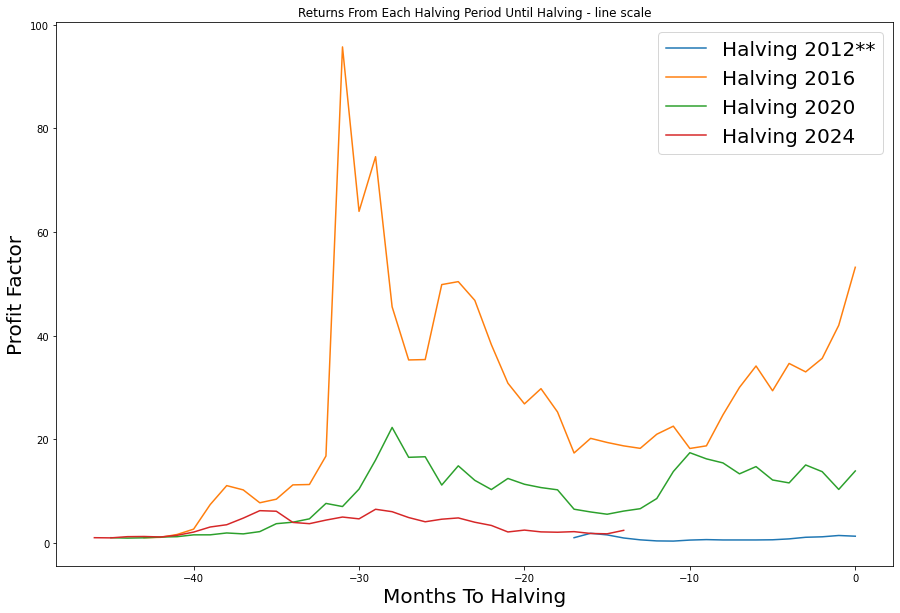

In [27]:
plt.figure(figsize=(15,10))

plt.plot(df_halving_0.index, df_halving_0["Price_0"]/df_halving_0["Price_0"].iloc[0],linewidth=1.5,label="Halving 2012**")
plt.plot(df_halving_1.index, df_halving_1["Price_1"]/df_halving_1["Price_1"].iloc[0],linewidth=1.5,label="Halving 2016")
plt.plot(df_halving_2.index, df_halving_2["Price_2"]/df_halving_2["Price_2"].iloc[0],linewidth=1.5,label="Halving 2020")
plt.plot(df_halving_3.index, df_halving_3["Price_3"]/df_halving_3["Price_3"].iloc[0],linewidth=1.5,label="Halving 2024")


plt.title("Returns From Each Halving Period Until Halving - line scale")

plt.xlabel('Months To Halving',fontsize=20)

plt.ylabel('Profit Factor',fontsize=20)

plt.legend(fontsize=20)

plt.show()

## 4.2. Halvings Performance - log scale

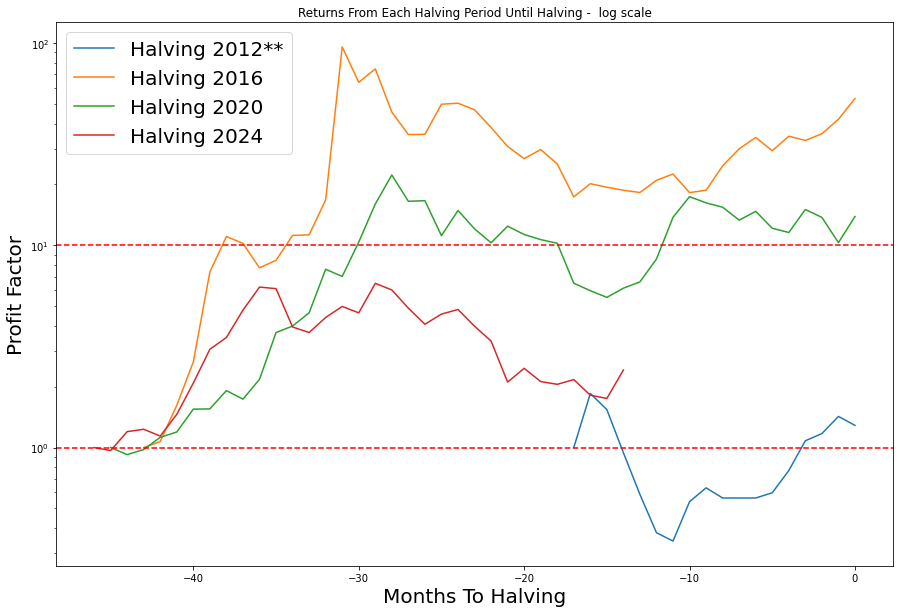

In [28]:
plt.figure(figsize=(15,10))

plt.plot(df_halving_0.index, df_halving_0["Price_0"]/df_halving_0["Price_0"].iloc[0],linewidth=1.5,label="Halving 2012**")
plt.plot(df_halving_1.index, df_halving_1["Price_1"]/df_halving_1["Price_1"].iloc[0],linewidth=1.5,label="Halving 2016")
plt.plot(df_halving_2.index, df_halving_2["Price_2"]/df_halving_2["Price_2"].iloc[0],linewidth=1.5,label="Halving 2020")
plt.plot(df_halving_3.index, df_halving_3["Price_3"]/df_halving_3["Price_3"].iloc[0],linewidth=1.5,label="Halving 2024")

plt.axhline(y = 1, color = 'r', linestyle = '--')

plt.axhline(y = 10, color = 'r', linestyle = '--')

plt.title("Returns From Each Halving Period Until Halving -  log scale")

plt.xlabel('Months To Halving',fontsize=20)

plt.ylabel('Profit Factor',fontsize=20)

pyplot.yscale('log')

plt.legend(fontsize=20)

plt.show()

Before Halving: It is hard to stablish a pattern in the previous 500 days of a halving.

After Halving: From this last plot it is clear that after a halving there is a common uptren in the next 300 days.

# 5. Predicting Possible scenaries Before for Halving 2024

In [29]:
n=int(duh/30) #Number of months until the next halving in May 2024

In [30]:
print(f"The aim is to predict possible scenaries for BTC in the next {n} weeks until the next halving starts")

The aim is to predict possible scenaries for BTC in the next 16 weeks until the next halving starts


In [31]:
df_bh = df_halving_0.join(df_halving_1).join(df_halving_2)
df_bh = df_bh[df_bh.index>-1*n]
df_bh

,Price_0,Date_0,returns_0,Price_1,Date_1,returns_1,Price_2,Date_2,returns_2
-15,13.4,2011-07-31,-0.167702,244.1,2015-03-31,-0.039355,3437.2,2019-01-31,-0.073381
-14,8.2,2011-08-31,-0.388060,235.8,2015-04-30,-0.034002,3816.6,2019-02-28,0.110381
-13,5.1,2011-09-30,-0.378049,229.8,2015-05-31,-0.025445,4102.3,2019-03-31,0.074857
-12,3.3,2011-10-31,-0.352941,264.1,2015-06-30,0.149260,5320.8,2019-04-30,0.297028
-11,3.0,2011-11-30,-0.090909,283.7,2015-07-31,0.074214,8558.3,2019-05-31,0.608461
-10,4.7,2011-12-31,0.566667,229.5,2015-08-31,-0.191047,10818.6,2019-06-30,0.264106
-9,5.5,2012-01-31,0.170213,235.9,2015-09-30,0.027887,10082.0,2019-07-31,-0.068086
-8,4.9,2012-02-29,-0.109091,311.2,2015-10-31,0.319203,9594.4,2019-08-31,-0.048363
-7,4.9,2012-03-31,0.000000,378.0,2015-11-30,0.214653,8284.3,2019-09-30,-0.136548
-6,4.9,2012-04-30,0.000000,430.0,2015-12-31,0.137566,9152.6,2019-10-31,0.104813


In [32]:
date_to_predict = pd.date_range('2023-01-30','2024-05-31', 
              freq='MS').strftime("%Y-%m-%d").tolist()

In [33]:
df_bh["Date_3"]=date_to_predict

## 5.1. BTC performance 16 months before each Halving.

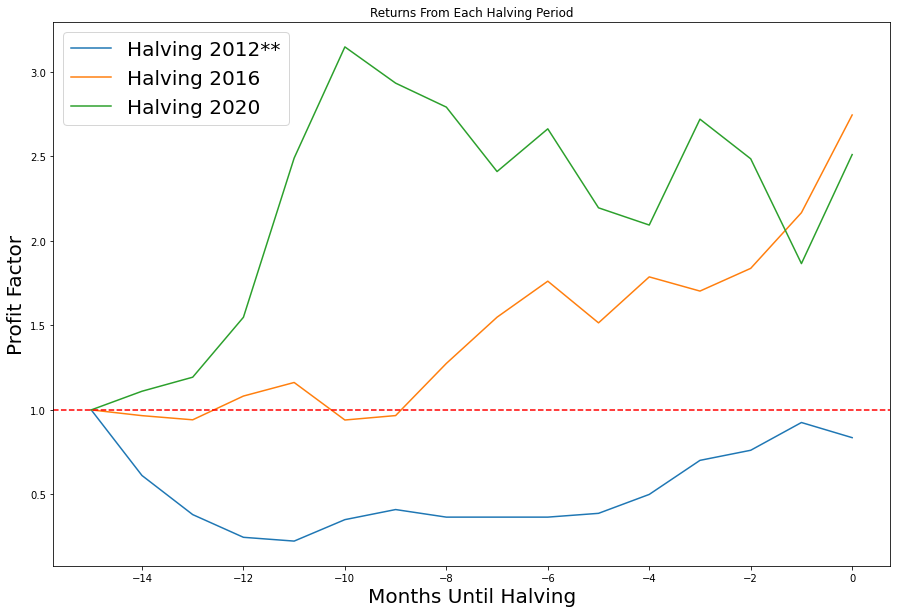

In [34]:
plt.figure(figsize=(15,10))

plt.plot(df_bh.index, df_bh["Price_0"]/df_bh["Price_0"].iloc[0],linewidth=1.5,label="Halving 2012**")
plt.plot(df_bh.index, df_bh["Price_1"]/df_bh["Price_1"].iloc[0],linewidth=1.5,label="Halving 2016")
plt.plot(df_bh.index, df_bh["Price_2"]/df_bh["Price_2"].iloc[0],linewidth=1.5,label="Halving 2020")

plt.axhline(y = 1, color = 'r', linestyle = '--')


plt.title("Returns From Each Halving Period")

plt.xlabel('Months Until Halving',fontsize=20)

plt.ylabel('Profit Factor',fontsize=20)
#pyplot.yscale('log')
plt.legend(fontsize=20)
plt.show()

## 5.2. Extrapoling previous performance to the current bitcoin price

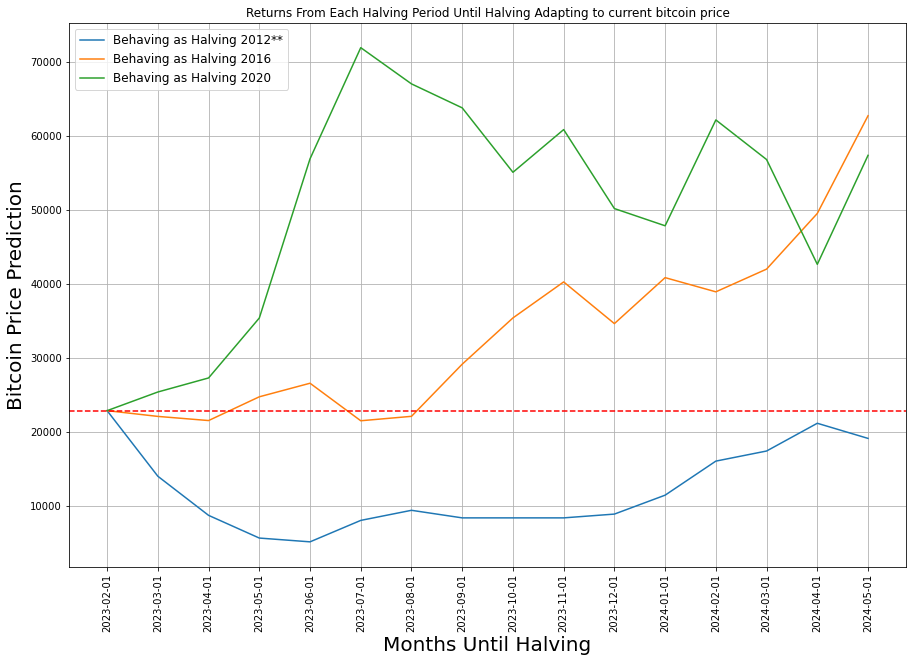

In [35]:
plt.figure(figsize=(15,10))

plt.plot(date_to_predict, price_btc_today*df_bh["Price_0"]/df_bh["Price_0"].iloc[0],linewidth=1.5,label="Behaving as Halving 2012**")
plt.plot(date_to_predict, price_btc_today*df_bh["Price_1"]/df_bh["Price_1"].iloc[0],linewidth=1.5,label="Behaving as Halving 2016")
plt.plot(date_to_predict, price_btc_today*df_bh["Price_2"]/df_bh["Price_2"].iloc[0],linewidth=1.5,label="Behaving as Halving 2020")

plt.axhline(y = price_btc_today, color = 'r', linestyle = '--')

plt.title("Returns From Each Halving Period Until Halving Adapting to current bitcoin price")

plt.xlabel('Months Until Halving',fontsize=20)

plt.xticks(date_to_predict,rotation=90)
plt.grid()
plt.ylabel('Bitcoin Price Prediction',fontsize=20)
#pyplot.yscale('log')
plt.legend(fontsize=12,loc='upper left')
plt.show()

## 5.3. Monte Carlo Simulations using the returns in the previous 16 months halvings.

In [92]:
returns = df_bh[["returns_0","returns_1","returns_2"]].values.tolist()
returns = [item for sublist in returns for item in sublist]
returns = [x+1 for x in returns]

monteCarlo_gross = pd.DataFrame(index=range(n))
monteCarlo_cum = pd.DataFrame(index=range(n))
for i in range(50):
    l = []
    
    l = random.choices(returns, k=n)
    
    monteCarlo_gross[str(i)] = l
    
    monteCarlo_cum[str(i)] = monteCarlo_gross[str(i)].cumprod()

No handles with labels found to put in legend.


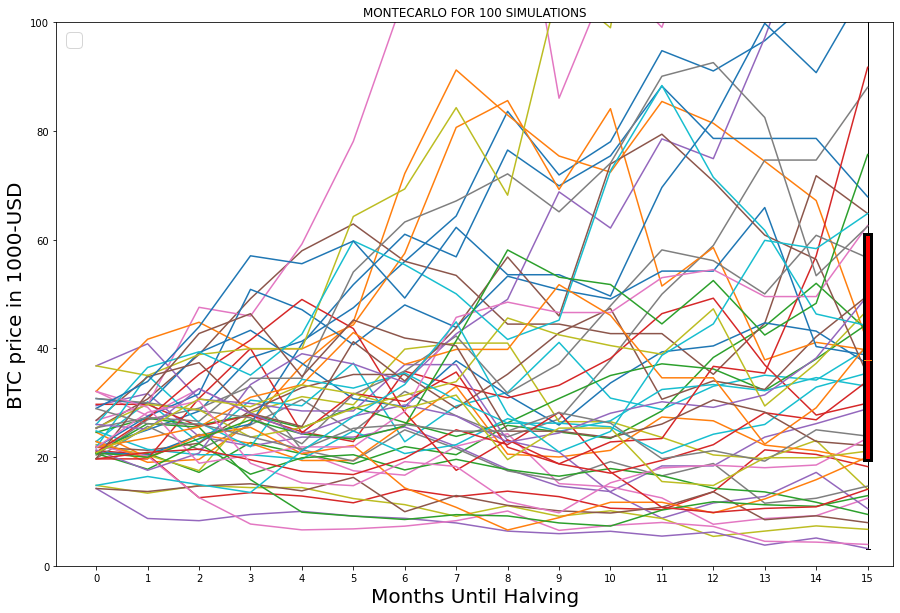

In [98]:
fig, ax = plt.subplots(figsize=(15,10))
bp = ax.boxplot(monteCarlo_cum.iloc[-1]*0.001*price_btc_today, patch_artist=True,positions=[15])

for box in bp['boxes']:
    box.set_facecolor('red')
    box.set_linewidth(3)

plt.plot(monteCarlo_cum.index,0.001*price_btc_today*monteCarlo_cum)
plt.title("MONTECARLO FOR 100 SIMULATIONS")
plt.xlabel('Months Until Halving',fontsize=20)
plt.ylabel('BTC price in 1000-USD',fontsize=20)
plt.ylim(0,100)
plt.legend(fontsize=20)
ax.set_xticks(np.arange(len(monteCarlo_cum.index.tolist())))
ax.set_xticklabels(monteCarlo_cum.index.tolist())
plt.show()


In [109]:
print("Quartiles: ")
print(monteCarlo_cum.iloc[-1].quantile([0.25,0.5,0.75])*0.001*price_btc_today)

Quartiles: 
0.25    19.505895
0.50    37.935606
0.75    60.999183
Name: 15, dtype: float64


In [124]:
prices_scenary_h2024 = (monteCarlo_cum.iloc[-1].quantile([0.25,0.5,0.75])*0.001*price_btc_today).values

In [95]:
consistency=[]
mean_returns=[]

for i in list(df_bh.index.values)[::-1]:
    
    mean_returns.append((df_bh.returns_0.iloc[i]+df_bh.returns_1.iloc[i]+df_bh.returns_2.iloc[i])/3)
    
    if df_bh.returns_0.iloc[i]>0 and df_bh.returns_1.iloc[i]>0 and df_bh.returns_2.iloc[i]>0:
        consistency.append("PRC") #Positive Returns Consistency
    
    elif df_bh.returns_0.iloc[i]<0 and df_bh.returns_1.iloc[i]<0 and df_bh.returns_2.iloc[i]<0:
        consistency.append("NRC") #Negative Returns Consistency
        
    else:
        consistency.append(0)
    
df_bh["consistency"] = consistency

df_bh["mean_returns"] = mean_returns

# 6. Predicting Possible Scenaries After for Halving 2024

The aim is to understan what can happen after the halving of 2024

In [101]:
#Renaming the index to fo forward instead of backward as before
df_halving_1.index = range(0,len(df_halving_1.index))
df_halving_2.index = range(0,len(df_halving_2.index))
df_halving_3.index = range(0,len(df_halving_3.index))

In [102]:
#Geting just the first 16th months after the halving
df_ah = df_halving_1.loc[0:15].join(df_halving_2.loc[0:15]).join(df_halving_3.loc[0:15])

## 7.1. BTC performance 16 months after each Halving.

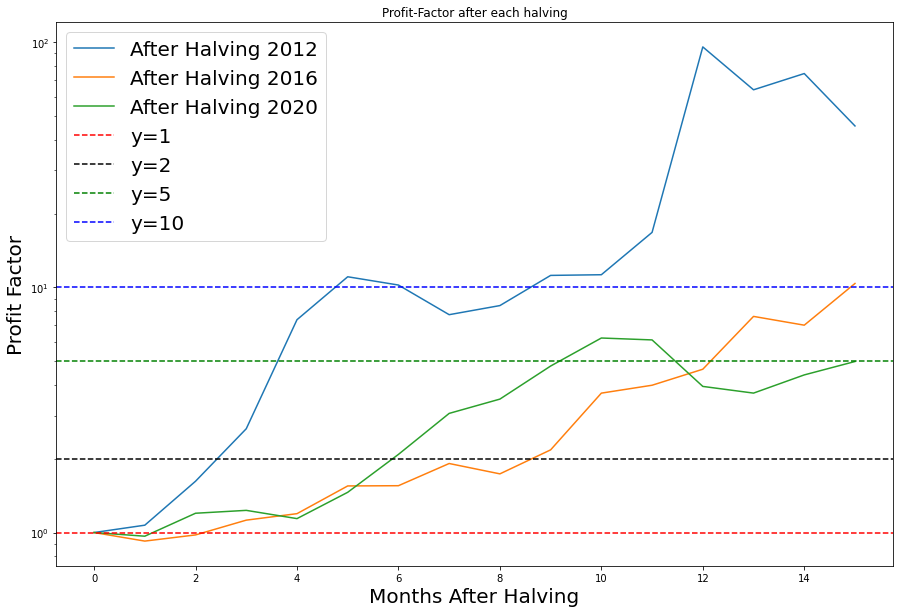

In [106]:
plt.figure(figsize=(15,10))

plt.plot(df_ah.index, df_ah["Price_1"]/df_ah["Price_1"].iloc[0],linewidth=1.5,label="After Halving 2012")
plt.plot(df_ah.index, df_ah["Price_2"]/df_ah["Price_2"].iloc[0],linewidth=1.5,label="After Halving 2016")
plt.plot(df_ah.index, df_ah["Price_3"]/df_ah["Price_3"].iloc[0],linewidth=1.5,label="After Halving 2020")

plt.axhline(y = 1, color = 'r', linestyle = '--',label="y=1")
plt.axhline(y = 2, color = 'k', linestyle = '--',label="y=2")
plt.axhline(y = 5, color = 'g', linestyle = '--',label="y=5")
plt.axhline(y = 10, color = 'b', linestyle = '--',label="y=10")

plt.title("Profit-Factor after each halving")

plt.xlabel('Months After Halving',fontsize=20)
plt.ylabel('Profit Factor',fontsize=20)
pyplot.yscale('log')
#plt.yticks([1,2,5,10,100])
plt.legend(fontsize=20)
plt.show()

In [130]:
low = prices_scenary_h2024[0]

In [131]:
up = prices_scenary_h2024[2]

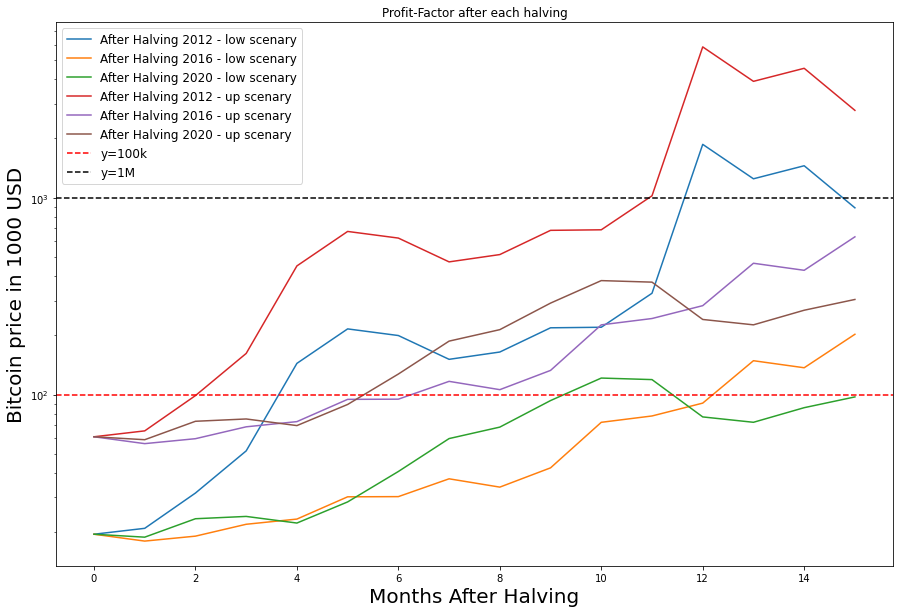

In [143]:
plt.figure(figsize=(15,10))

plt.plot(df_ah.index, low*df_ah["Price_1"]/df_ah["Price_1"].iloc[0],linewidth=1.5,label="After Halving 2012 - low scenary")
plt.plot(df_ah.index, low*df_ah["Price_2"]/df_ah["Price_2"].iloc[0],linewidth=1.5,label="After Halving 2016 - low scenary")
plt.plot(df_ah.index, low*df_ah["Price_3"]/df_ah["Price_3"].iloc[0],linewidth=1.5,label="After Halving 2020 - low scenary")

plt.plot(df_ah.index, up*df_ah["Price_1"]/df_ah["Price_1"].iloc[0],linewidth=1.5,label="After Halving 2012 - up scenary")
plt.plot(df_ah.index, up*df_ah["Price_2"]/df_ah["Price_2"].iloc[0],linewidth=1.5,label="After Halving 2016 - up scenary")
plt.plot(df_ah.index, up*df_ah["Price_3"]/df_ah["Price_3"].iloc[0],linewidth=1.5,label="After Halving 2020 - up scenary")

plt.axhline(y = 100, color = 'r', linestyle = '--',label="y=100k")
plt.axhline(y = 1000, color = 'k', linestyle = '--',label="y=1M")
#plt.axhline(y = 5, color = 'g', linestyle = '--',label="y=5")
#plt.axhline(y = 10, color = 'b', linestyle = '--',label="y=10")

plt.title("Profit-Factor after each halving")

plt.xlabel('Months After Halving',fontsize=20)
plt.ylabel('Bitcoin price in 1000 USD',fontsize=20)
pyplot.yscale('log')
#plt.yticks([1,2,5,10,100])
plt.legend(fontsize=12)
plt.show()